In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile 
from pathlib import Path
import os
from tqdm import tqdm
import sys
sys.path.append(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\10_code\UTvsXCT-preprocessing')
from preprocess_tools import aligner,onlypores

# AUX

In [22]:
def read_sequence(folder_path):
    """
    Read a sequence of TIFF files in a folder as a 3D volume.
    
    Args:
    folder_path (str): Path to the folder containing TIFF files.

    Returns:
    numpy.ndarray: A 3D array where each slice corresponds to a TIFF file.
    """

    # List and sort the TIFF files
    tiff_files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if (f.endswith('.tiff') or f.endswith('.tif'))])
    
    # Get the total number of TIFF files
    total_files = len(tiff_files)
    
    # Read each TIFF file and update progress
    volume = []
    with tqdm(total=total_files, desc="Progress") as pbar:
        for i, file_path in enumerate(tiff_files):
            slice_data = tifffile.imread(file_path)
            volume.append(slice_data)
            
            # Update progress
            pbar.update(1)
    
    return np.array(volume)

# Load

In [23]:
filename = Path(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\02_XCT_data\Juan Ignacio\probetas\10\volume_eq')

data = read_sequence(filename)

Progress: 100%|██████████| 3226/3226 [00:37<00:00, 85.19it/s]


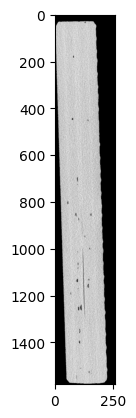

In [24]:
plt.imshow(data[50], cmap='gray')

In [25]:
aligned_volume = aligner.main(data)

aligned_volume.dtype

computing otsu
Transforming
computing otsu
Bounding box coordinates: zmin=0, zmax=3225, ymin=20, ymax=1592, xmin=82, xmax=286


dtype('uint8')

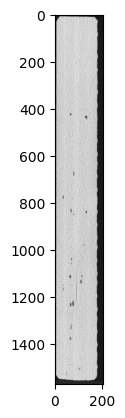

In [26]:
plt.imshow(aligned_volume[40], cmap='gray')

# Centering

In [27]:
from preprocess_tools import onlypores

mask = onlypores.material_mask_parallel(aligned_volume)

computing otsu


In [28]:
# Find the bounding box of the object in the mask
coords = np.where(mask)
zmin, zmax = coords[0].min(), coords[0].max()
ymin, ymax = coords[1].min(), coords[1].max()
xmin, xmax = coords[2].min(), coords[2].max()

print(f"Bounding box coordinates: zmin={zmin}, zmax={zmax}, ymin={ymin}, ymax={ymax}, xmin={xmin}, xmax={xmax}")

# Crop both arrays
cropped_mask = mask[zmin:zmax+1, ymin:ymax+1, xmin:xmax+1]
cropped_aligned_volume = aligned_volume[zmin:zmax+1, ymin:ymax+1, xmin:xmax+1]

Bounding box coordinates: zmin=0, zmax=3225, ymin=0, ymax=1572, xmin=0, xmax=204


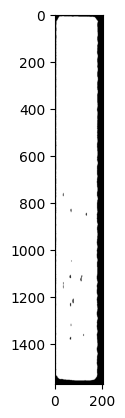

In [29]:
plt.imshow(cropped_mask[30], cmap='gray')

In [30]:
# #save the aligned volume as a tiff file
# output_path = filename.parent / 'centered.tif'
# tifffile.imwrite(output_path, cropped_aligned_volume)